# K-means Clustering

### Import resources and display image

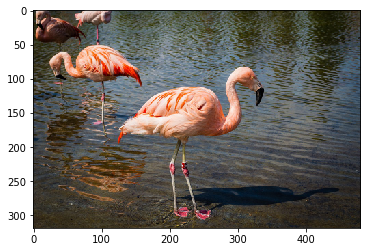

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/flamingos.jpg')

# Resize to half of the original
resized_image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2)) 

# Change color to RGB (from BGR)
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

plt.imshow(resized_image)

### Prepare data for k-means

In [3]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = resized_image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

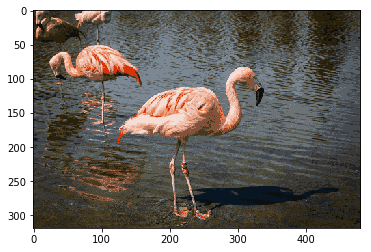

In [6]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

## TODO: Select a value for k
# then perform k-means clustering
k = 20
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((resized_image.shape))
labels_reshape = labels.reshape(resized_image.shape[0], resized_image.shape[1])

plt.imshow(segmented_image)

In [ ]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 638 but corresponding boolean dimension is 319
  import sys


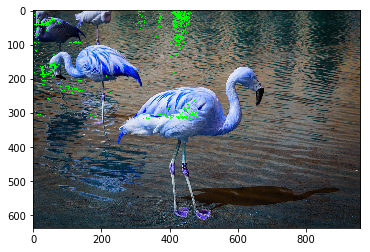

In [7]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)
